# Gaussian Mixture Models for Clustering

  - A GMM assumes that the data is generated from a mixture of several Gaussian distributions, each with its own mean, covariance, and weight.
  - GMMs use Expectation-Maximization (EM) algorithm to iteratively find the parameters (mean, covariance) of the Gaussian components and assign data points to each component.

---

  - Use `sklearn.mixture.GaussianMixture` to apply GMM clustering on a synthetic dataset or real-world dataset (such as digits or Iris).
  - Vary the number of components (`n_components`) and observe how the model fits the data.

**Code Example**:



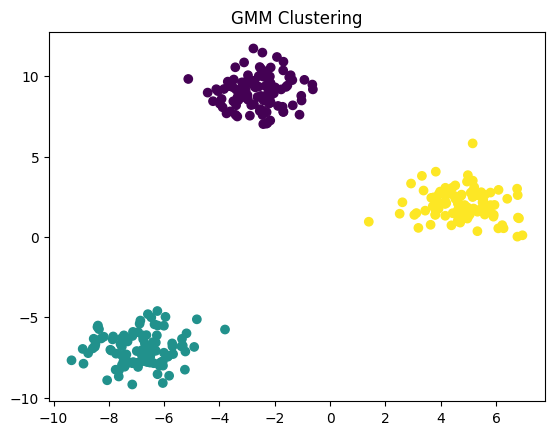

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data with 3 clusters
X, y = make_blobs(n_samples=300, centers=3, random_state=42)

# Apply GMM clustering
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X)
gmm_labels = gmm.predict(X)

# Plot the GMM clustering results
plt.scatter(X[:, 0], X[:, 1], c=gmm_labels, cmap='viridis')
plt.title('GMM Clustering')
plt.show()

# Determine the Optimal Number of Clusters Using BIC/AIC

We can use the Bayesian Information Criterion (BIC) and Akaike Information Criterion (AIC) to determine the optimal number of clusters (components).

The aim is to compare BIC and AIC for a range of n_components (e.g., from 1 to 10) to find the best fitting model.

The **BIC** (Bayesian Information Criterion) and **AIC** (Akaike Information Criterion) scores are calculated for different numbers of components (`n_components`).  

The best model is the one that minimizes the BIC or AIC score.

### Explanation of BIC and AIC

- **Bayesian Information Criterion (BIC)**:  
  BIC is a model selection criterion based on the likelihood function and a penalty for the number of parameters in the model. It is used to find the model that best balances model fit and complexity. A lower BIC value indicates a better model. The formula for BIC is:

  \[
  \text{BIC} = \log(n)k - 2\log(L)
  \]
  Where:
  - \(n\) is the number of data points,
  - \(k\) is the number of parameters in the model,
  - \(L\) is the likelihood of the model.

  BIC penalizes complex models with more parameters, which can lead to overfitting. A lower BIC is preferred because it suggests that the model is both a good fit and not overly complex.

- **Akaike Information Criterion (AIC)**:  
  AIC is also a model selection criterion, similar to BIC, but it uses a different penalty for the number of parameters. It is aimed at finding a model that best explains the data without overfitting. A lower AIC value indicates a better model. The formula for AIC is:

  \[
  \text{AIC} = 2k - 2\log(L)
  \]
  Where:
  - \(k\) is the number of parameters,
  - \(L\) is the likelihood of the model.

  Like BIC, AIC penalizes models with more parameters but is generally less stringent than BIC in its penalty for complexity.

Both **BIC** and **AIC** help to identify the optimal number of components in mixture models, like **Gaussian Mixture Models (GMMs)**, by balancing model complexity and fit.


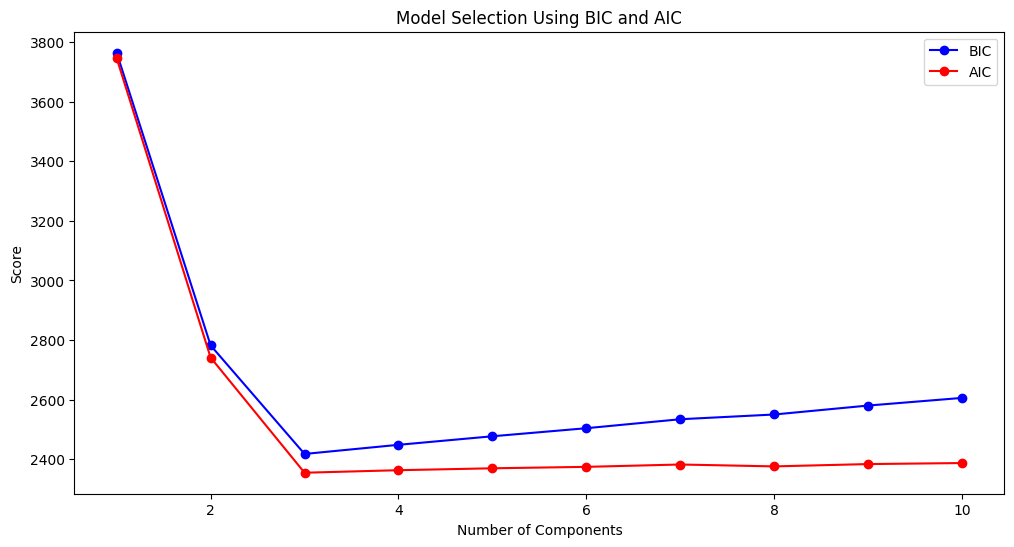

Best number of components according to BIC: 3
Best number of components according to AIC: 3


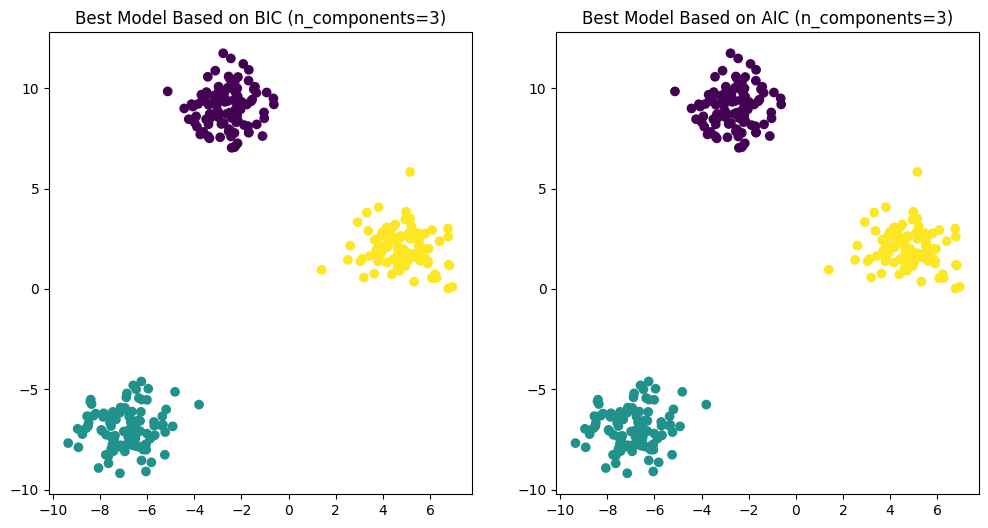

In [ ]:
# Store BIC and AIC scores for different n_components
bic_scores = []
aic_scores = []
n_components_range = range(1, 11)  # Test for n_components between 1 and 10

# Fit Gaussian Mixture Models for different number of components
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=0)
    gmm.fit(X)

    # Append the BIC and AIC for the current model
    bic_scores.append(gmm.bic(X))
    aic_scores.append(gmm.aic(X))

# Plot BIC and AIC scores
plt.figure(figsize=(12, 6))
plt.plot(n_components_range, bic_scores, label='BIC', color='blue', marker='o')
plt.plot(n_components_range, aic_scores, label='AIC', color='red', marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Score')
plt.title('Model Selection Using BIC and AIC')
plt.legend()
plt.show()

# Find the number of components with the lowest BIC and AIC
best_n_components_bic = n_components_range[np.argmin(bic_scores)]
best_n_components_aic = n_components_range[np.argmin(aic_scores)]

print(f"Best number of components according to BIC: {best_n_components_bic}")
print(f"Best number of components according to AIC: {best_n_components_aic}")

# Fit the best GMM model according to BIC
best_gmm_bic = GaussianMixture(n_components=best_n_components_bic, random_state=0)
best_gmm_bic.fit(X)
best_labels_bic = best_gmm_bic.predict(X)

# Fit the best GMM model according to AIC
best_gmm_aic = GaussianMixture(n_components=best_n_components_aic, random_state=0)
best_gmm_aic.fit(X)
best_labels_aic = best_gmm_aic.predict(X)

# Visualize the clustering results for the best models based on BIC and AIC
plt.figure(figsize=(12, 6))

# Plot the results for the best model based on BIC
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=best_labels_bic, cmap='viridis')
plt.title(f'Best Model Based on BIC (n_components={best_n_components_bic})')

# Plot the results for the best model based on AIC
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=best_labels_aic, cmap='viridis')
plt.title(f'Best Model Based on AIC (n_components={best_n_components_aic})')

plt.show()



# Visualizing GMM Clustering Results

Visualize the clustering results and the Gaussian components fitted by the model.

Use contour plots to visualize the probability density of each Gaussian component.

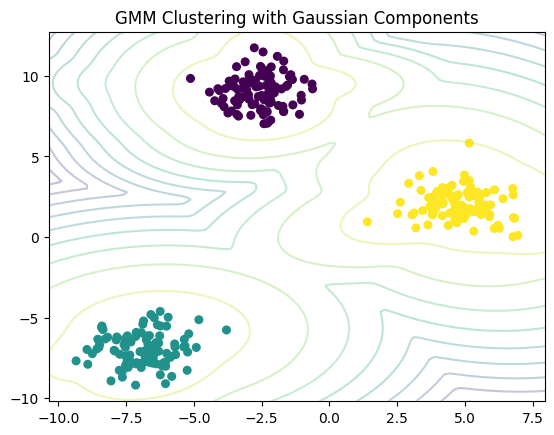

In [ ]:
# Visualizing the GMM clusters and Gaussian components
plt.scatter(X[:, 0], X[:, 1], c=gmm_labels, cmap='viridis', s=30)
plt.title('GMM Clustering with Gaussian Components')

# Create a grid to plot the Gaussian components
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = np.array([gmm.score_samples(np.c_[xx.ravel(), yy.ravel()])]).T
Z = Z.reshape(xx.shape)

# Plot the contour map
plt.contour(xx, yy, Z, levels=10, cmap='viridis', alpha=0.3)
plt.show()

## Outlier Detection with GMM

### Objective:
Use Gaussian Mixture Models (GMM) to detect outliers in a dataset.

### Task:
1. Generate or load a dataset that contains one or more outliers.
2. Fit a GMM model to the dataset.
3. Examine the **responsibilities** (probabilities of a data point belonging to a cluster) for each point.
4. Identify outliers by detecting points with low responsibility values (i.e., low probability of belonging to any cluster). These points can be considered as outliers.
5. Visualize the clustering results and highlight the outliers.



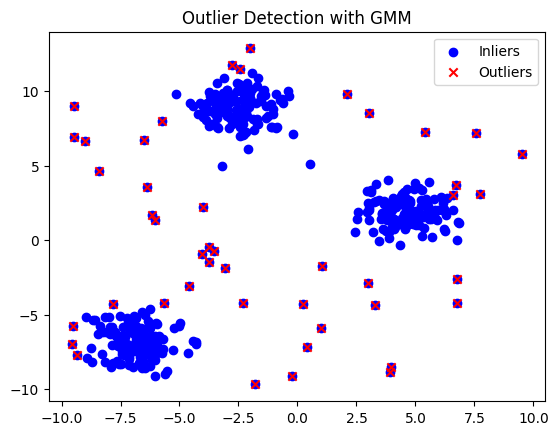

Outlier points detected: [ 23  56  57  68 128 198 258 265 308 315 401 402 403 404 406 407 408 409
 411 413 414 415 416 418 419 420 421 422 423 425 426 427 428 429 430 432
 433 434 435 437 438 439 440 442 444]


In [ ]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Step 1: Generate synthetic data with outliers
X, _ = make_blobs(n_samples=400, centers=3, cluster_std=1.0, random_state=42)

# Adding outliers
X_with_outliers = np.vstack([X, np.random.uniform(low=-10, high=10, size=(45, 2))])  # Adding 45 outliers

# Step 2: Fit a GMM model
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=42)
gmm.fit(X_with_outliers)

# Step 3: Calculate the log likelihood of each point
log_likelihood = gmm.score_samples(X_with_outliers)

# Step 4: Identify outliers - points with low log likelihood
# Points with low log likelihood values can be considered outliers.
threshold = np.percentile(log_likelihood, 10)  # For example, treat the lowest 10% of log likelihoods as outliers
outliers = np.where(log_likelihood < threshold)[0]

# Step 5: Visualize the clustering results and highlight the outliers
plt.scatter(X_with_outliers[:, 0], X_with_outliers[:, 1], c='blue', label='Inliers')
plt.scatter(X_with_outliers[outliers, 0], X_with_outliers[outliers, 1], c='red', label='Outliers', marker='x')
plt.title('Outlier Detection with GMM')
plt.legend()
plt.show()

# Step 6: Output the indices of outliers
print(f"Outlier points detected: {outliers}")


# Exercise:

# Outlier Detection in a Customer Segmentation Dataset Using DBSCAN and GMM

## Objective:
Detect outliers in a synthetic customer segmentation dataset, which contains Age, Income, and Spending Score features. The aim is to detect customers whose behaviors do not fit well into any of the identified clusters.

## Data:
We will generate a synthetic dataset with Age, Income, and Spending Score features using sklearn's `make_blobs` and then apply DBSCAN to detect outliers. Afterward, you'll use Gaussian Mixture Models (GMM) to verify the outliers based on the log-likelihood of each point.

You need to use the following data for data generation as well as normalization.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate synthetic data: 300 samples, 3 centers (clusters)
X, y = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

# Add some noise (outliers) to the data
X_with_outliers = np.vstack([X, np.random.uniform(low=-10, high=10, size=(10, 2))])

# Convert to DataFrame for convenience
df = pd.DataFrame(X_with_outliers, columns=['Age', 'Income'])
df['Spending Score'] = np.random.uniform(1, 100, size=(df.shape[0],))

# Visualize the first few rows of the synthetic dataset
print(df.head())


10         Age    Income  Spending Score
0 -7.338988 -7.729954        6.283773
1 -7.740041 -7.264665       83.147636
2 -1.686653  7.793442       71.958186
3  4.422198  3.071947       11.597173
4 -8.917752 -7.888196        3.006157


In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['Age', 'Income', 'Spending Score']])

## Next steps:

a) Apply DBSCAN for Outlier Detection
You need to apply DBSCAN to identify outliers based on the density of data points. Outliers will be labeled as `-1` by DBSCAN.

b) Visualize the clusters formed by DBSCAN and highlight the outliers.

c) Apply Gaussian Mixture Model (GMM) to the data and use the log-likelihood to check which points do not fit well with the Gaussian distributions. Low log-likelihood points are considered outliers.

d) Visualize the GMM detected outliers.

e) Compare DBSCAN and GMM Outliers.